In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

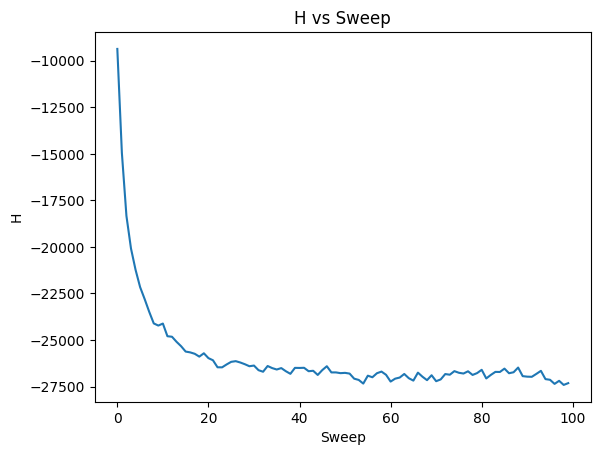

In [2]:
df = pd.read_csv('./Datos/issing_2d.csv')

plt.plot(df["sweep"],df["H"])
plt.xlabel('Sweep')
plt.ylabel('H')
plt.title('H vs Sweep')
plt.show()